In [34]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [35]:
def show(img):
    plt.figure(figsize=(6,4),dpi=120)
    plt.xticks([]),plt.yticks([])
    plt.imshow(imutils.opencv2matplotlib(img))

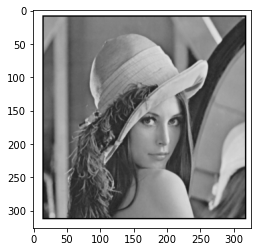

In [36]:
#导入lena图像并转化成灰度图
lena=cv.imread('/Users/lixuecheng/Downloads/OpenCV/代码+资料/第2-7章notebook课件/图像操作/lena.png',0)

#转换为32位
lena32=np.float32(lena)
plt.imshow(lena32,cmap='gray')

In [37]:
dft_lena=cv.dft(lena32,flags=cv.DFT_COMPLEX_OUTPUT)

In [38]:
#将低频信息放到中间
fft_lena=np.fft.fftshift(dft_lena)

In [39]:
mag_lena=20*np.log(cv.magnitude(fft_lena[:,:,0],fft_lena[:,:,1]))

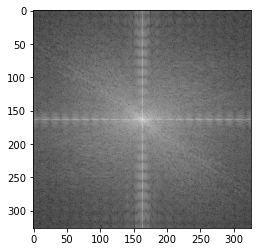

In [40]:
plt.imshow(mag_lena,cmap='gray')

In [42]:
#获取图像信息
row,col=lena.shape

mrow,mcol=int(row/2),int(col/2)

#创建掩码
mask=np.zeros((row,col,2),np.uint8)
mask[mrow-30:mrow+30,mcol-30:mcol+30]=1

mask_lena=mask*fft_lena

In [43]:
shift_mask_lena=np.fft.fftshift(mask_lena)

In [44]:
idft_shift_mask_lena=cv.idft(shift_mask_lena)

In [47]:
mag_mask_lena=cv.magnitude(idft_shift_mask_lena[:,:,0],idft_shift_mask_lena[:,:,1])

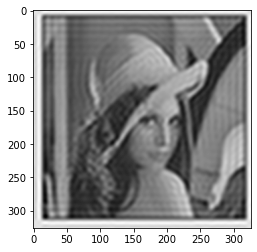

In [48]:
plt.imshow(mag_mask_lena,cmap='gray')

In [49]:
#高通滤波
mask=np.ones((row,col,2),np.uint8)

In [50]:
mask[mrow-30:mrow+30,mcol-30:mcol+30]=0

In [51]:
mask_lena=mask*fft_lena
shift_lena=np.fft.fftshift(mask_lena)

In [52]:
idf_shift_lena=cv.idft(shift_lena)

In [54]:
mag_result=cv.magnitude(idf_shift_lena[:,:,0],idf_shift_lena[:,:,1])

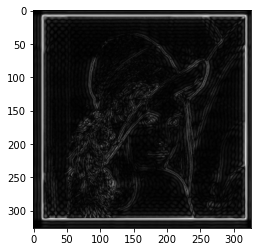

In [55]:
plt.imshow(mag_result,cmap='gray')